# The Spaceship Titanic <a name='top'></a>
By: Tyler Blankenship, Kao Takahama, Tyler Selby, Safal Lamichhane, Niharika Rasthapuram, and Zach Seitz<br>
CS603: Introduction to Data Analytics <br>
Spring 2023<br>
Southeast Missouri State University<br>
Dr. Liu<br>

Data set: https://www.kaggle.com/c/spaceship-titanic


# Table of Contents
* [Introduction](#introduction)<br><br>
* [Data Loading](#data-loading)
    * [Exploration](#exploration)
    * [The `Age` feature](#age)
    * [Missing data](#missing)
    * [Data loading summary](#load-summary)<br><br>    
* [Data Cleaning](#data-cleaning)
    * [Drop `Name`](#drop-name)
    * [Populate spending `NaN` values](#populate)
    * [Drop `NaN` rows](#drop)
    * [Feature extraction](#extraction)
        * [The `Deck` and `Side` features](#deck-side)
        * [The `Group` feature](#group)
    * [Data cleaning summary](#clean-summary)<br><br> 
* [Data Wrangling and Aggregation](#wrangling)
    * [Part 1: General exploration](#p1)
        * [Data set balance](#balance)
        * [Categorical feature summary](#cat-stats)
        * [The `VIP` feature](#vip)
        * [`Age` distribution](#age-dist)
        * [Part 1 summary](#p1-summary)<br><br>
    * [Part 2: Passenger survival](#p2)
        * [Question 1: How is embarking from or traveling to a specific location associated with survival?](#p2q1)
            * [Question 1 summary](#p2q1-summary)<br><br>
        * [Question 2: Is passenger socioeconomic status related to survival?](#p2q2)
            * [The `TotalSpent` feature](#spent)
            * [The `Class` feature](#class)
            * [Question 2 summary](#p2q2-summary)<br><br>
        * [Question 3: Is CryoSleep related to survival?](#p2q3)
            * [Question 3 summary](#p2q3-summary)<br><br>
        * [Question 4: Is location of cabin (`Deck`, `Side`) related to survival](#p2q4)
            * [Question 4 summary](#p2q4-summary)<br><br>
        * [Part 2 summary](#p2-summary)<br><br>
* [Conclusion](#conclusion)<br><br>
* [Future Directions](#future)<br><br>

# Introduction <a name='introduction'></a>
[Back to top](#top)

The data set contains various features about passengers aboard the Spaceship Titanic when it was stuck by a spacetime anomaly. The most important feature of the data set is whether the passenger was transported to an alternate dimension (`Transported == True`; did not survive) or remained on board (`Transported == False`; survived).

Kaggle provides two sets of data, a training set and a test set. Since the test set is used to test ML models, it does not contain `Transported` data. As such, we will only be using the data contained within the training set, `train.csv`.

The goal for this project is distinct from that of the Kaggle competition. Instead, while the discussion here will include properties affecting passenger survival, it will also touch on general exploration of the data with a focus on implementing common data analysis methodologies.

# Data Loading <a name='data-loading'></a>
[Back to top](#top)

Before meaningful analysis may occur, it's important to get acquanited with the data set. In this section, we'll do some basic exploration of the data and its properties. We'll also check for missing data and decide how to handle it, and we'll determine whether or not various other data cleaning operations will be necessary.

## Exploration <a name='exploration'></a>
[Back to top](#top)

One thing to keep in mind while exploring is the nature of the data. For example, different operations may be performed on numerical data compared to categorical data. Furthermore, both numerical and categorical data have sub types that may facilitate other methods. 

While data sets already contain a number of features, it's often helpful to extract other features by splitting up or amalgamating a set of features. Sometimes, these extracted features will be obvious from the outset, while others may not reveal themselves until further analysis occurs. Still others may only be helpful temporarily or for a specific methodology. Over the course of the analysis, we will encounter a couple of these types of features. 

However, before we get ahead of ourselves, we first need to import the necessary libraries and load in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set
df = pd.read_csv('train.csv')
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [3]:
# Get basic summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


It looks like data set contains 8,693 total entries and 14 unique features. The table above also shows that the only columns without missing data are `PassengerId` and `Transported`. Ultimately, however, no single feature is missing so much data that it is worth dropping outright, so we'll keep them all in until we explore a bit further.

We can see that, while most of the data is categorical, there are some numerical features we can look more closely at using built-in pandas methods. For example, columns 7-11 above represent the amount of money passengers spent at the respective amenity aboard the Spaceship Titanic.

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### The `Age` feature <a name='age'></a>
[Back to top](#top)


The zeros in the `min` row of the table above show possible missing data. To get a better idea of whether or not these are true zeros, let's look more closely at the `Age` column.

In [5]:
# Get count of ages amongst passengers
df_age_0_count = df.groupby('Age')[['PassengerId']].count()
print(df_age_0_count)

      PassengerId
Age              
0.0           178
1.0            67
2.0            75
3.0            75
4.0            71
...           ...
75.0            4
76.0            2
77.0            2
78.0            3
79.0            3

[80 rows x 1 columns]


The table above show's that here are 178 passengers where `Age == 0`. Let's take a look at the first five of them.

In [6]:
# Get all passengers whose Age == 0
df_age_0 = df[df.Age == 0]
df_age_0.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False


Now let's take a look at the first five passengers where `Age == NaN`.

In [7]:
# Get all passengers where Age == NaN
df_age_nan = df[pd.isna(df.Age)]
df_age_nan.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True


Since we can see that the lists of passengers are different, we now know that the data set differentiates between passengers whose age is actually 0 (taken to mean less than 1 year of age) and those whose age is missing. As such, we can safely drop rows where `Age == NaN`.

### Missing data <a name='missing'></a>
[Back to top](#top)

It may be possible to drop all rows with missing data using built-in functionality provided by padas. Let's first get a count of the number of rows with missing data:

In [8]:
# Check how many rows contain missing data
original_len = df.shape[0]
new_len = df.dropna(inplace=False).shape[0]

print(f"Number with missing data: {original_len - new_len}")
print(f"Remaining rows: {new_len}")

print(f"Percent of data set retained: {new_len/original_len*100}%")

Number with missing data: 2087
Remaining rows: 6606
Percent of data set retained: 75.99217761417232%


It looks like we'll keep about 76% of our original data set if we drop all `NaN` values. However, some columns will likely be dropped anyway, so if we hold off until we pare down the data set some more, we might be able to save some of our data. For example, we don't expect any relationship between `Name` and any other feature (since it's mostly unique to each passenger), so we can safely drop that column before dropping `NaN` values.

The `CryoSleep` feature also has important implications on the data set. `CryoSleep` is a boolean representing whether or not the passenger was frozen for the duration of the trip. If `CryoSleep == True` for a given passenger, that passenger would not be able to spend money at the amenities listed in columns 7-11. As such, if any of those data are missing for passengers where `CryoSleep == True`, we can safely populate those values with zeros.

We can count the number of rows that meet this condition:

In [9]:
# Count the number of rows where CryoSleep == True
# and any value in columns 7-11 is NaN
condition = df['CryoSleep'] & df.iloc[:, 7:12].isna().any(axis=1)
num_records = len(df[condition])

print(f"The number of sleepers with NaN spending values: {num_records}")

The number of sleepers with NaN spending values: 347


It looks like that would prevent us from losing 347 rows, which is about 4% of the total data set, so that's definitely a worthwhile operation.

Finally, we'll check for duplicate entries, so we can remove any that are found.

In [10]:
# Check for duplicates
duplicates = df[df.duplicated()]

print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


### Data loading summary <a name='load-summary'></a>
[Back to top](#top)

The data loading decisions we've made can be summarized as follows:
- Remove `Name` column
- Populate with zeros any `NaN` value in columns 7-11 where `CryoSleep == True`
- Drop all remaining rows containing `NaN` values
- Drop duplicate rows (we will skip this step since there weren't any)

These represent the more obvious cleaning operations that present themselves without looking into the dataset further. As such, it may be necessary to carry out other cleaning methods elsewhere. Importantly, we can also extract some features, which we'll talk more about in the Data Wrangling section.

## Data Cleaning <a name='data-cleaning'></a>
[Back to top](#top)

In this section, we'll implement our decisions from the previous section to drop rows and columns that are irrelevant to our analysis (duplicate data, NaN values, values that are unique in every row, etc.).

After the data set is cleaned, we will continue the preprocessing process and extract some features that may be useful in further analysis.

### Drop `Name` <a name="drop-name"></a>
[Back to top](#top)

In [11]:
# Drop Name column
df = df.drop(['Name'], axis=1)

In [12]:
# Verify Name column has been dropped
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False


### Populate spending `NaN` values <a name='populate'></a>
[Back to top](#top)

In [13]:
# Populate with zeros any NaN value in columns 7-11 where CryoSleep == True
df.iloc[condition, 7:12] = 0

In [14]:
# Verify NaN proliferation
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False


### Drop `NaN` rows <a name='drop'></a>
[Back to top](#top)

In [15]:
# Get a new count of the number of rows containing NaN values
new_len = df.dropna(inplace=False).shape[0]

print(f"Number of rows with missing data: {original_len - new_len}")
print(f"Number of rows retained: {new_len}")
print(f"Percent of data set retained: {new_len/original_len*100}%")

Number of rows with missing data: 1621
Number of rows retained: 7072
Percent of data set retained: 81.3528126078454%


By performing selective cleaning operations, we were able to save an additional 5% of our data set compared to just dropping all `NaN` outright. Utlimately, this will be enough data to work with, so we will not need to populate other values and we can safely drop the remaining `NaN` values at this point.

In [16]:
# Drop all rows containing NaN values
df.dropna(inplace=True)

In [17]:
# Verify that NaN rows have been dropped (expected: 7072)
print(f"Remaining data set length: {df.shape[0]}")

Remaining data set length: 7072


### Feature extraction <a name="extraction"></a>
[Back to top](#top)

As mentioned previously, there are a few features that could be extracted. This is often helpful in reducing the dimensionality of the data set, boosting the signal to noise ratio. It can also help make trends more apparent, leading to better analyses and conclusions.

#### The `Deck` and `Side` features <a name="deck-side"></a>
[Back to top](#top)

The data set contains a `Cabin` feature, which takes the following format: `deck/num/side`.

It stands to reason maybe passengers on a particular deck or particular side were more impacted than others, so this may have important implications for survival. It also makes sense to split this data up to adhere to proper separation of concerns. That is to say that there are inherently three distinct categories of data contained in a single feature, so we can split them up. The `deck` and `side` portions can be extracted into their own features (`Deck` and `Side`, respectively). We won't need to keep `num` since that's just an identifier for the room, so after extraction we can drop the original `Cabin` column entirely.

In [18]:
# Extract the Deck and Side features from the Cabin feature
df['Deck'] = df['Cabin'].str[0]
df['Side'] = df['Cabin'].str[-1]

# Drop the original Cabin
df = df.drop(['Cabin'], axis=1)

In [19]:
# Show successful addition of the Deck and Side features
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P


#### The `Group` feature <a name="group"></a>
[Back to top](#top)

Furthermore, `PassengerId` is in the form `gggg_pp`, where `gggg` represents the passenger's group and `pp` represents their id within the group. As such, we can similarly extract a `Group` feature from the `PassengerId` feature. 

We can then drop the original `PassengerId` feature because the `pp` portion loses meaning without the group identifier and it would be unique to each passenger anyway, so it's not super userful to our analysis. That is to say, we don't expect a relationship between the passenger's uniqe ID and the other features, but their membership within a group may show some kind of relationship(s). We can just use the index as the *de facto* passenger ID instead.

In [20]:
# Extract Group feature from PassengerId
df['Group'] = df['PassengerId'].str.split('_').str[0]

# Drop PassengerId
df = df.drop(['PassengerId'], axis=1)

In [21]:
# Verify creation of Group and dropping of PassengerId
df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Group
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0001


### Data cleaning summary <a name='clean-summary'></a>
[Back to top](#top)

The data cleaning operations we've performed can be summarized as follows:
- Removed `Name` column
- Populated with zeros any `NaN` value in columns 7-11 where `CryoSleep == True`
- Dropped all remaining rows containing `NaN` values

Additionally, we created the `Group` feature from `PassengerId` and the `Deck` and `Side` features from `Cabin`.

# Data Wrangling and Aggregation <a name='wrangling'></a>
[Back to top](#top)

This section is where we will come up with questions and use code to determine which values correlate with one another. Below is a general outline for this section:


## Part 1: General exploration
- Data set balance 
- Categorical feature summary
- The `VIP` feature
- `Age` distribution
- Part 1 summary


## Part 2 : Find the properties that are associated with passenger suvival
- Question 1: How is embarking from or traveling to a specific location associated with survival?
- Question 2: Is passenger socioeconomic status related to survival?
- Question 3: Is `CryoSleep` related to survival?
- Question 4: Is location of cabin (`Deck`, `Side`) related to survival
- Part 2 summary

## Part 1: General Exploration<a name='p1'></a>
[Back to top](#top)

It's often a good idea to explore the data set in a more general way, as previously hidden trends may start to reveal themselves. As such, before making assumptions about the data, we're going to performs some basic exploration.

### Data set balance <a name='balance'></a>
[Back to top](#top)

Before moving further, we should make sure we have roughly equal numbers of passegners where `Transported == True` and passengers where `Transported == False`, to ensure the data set is roughly balanced after the cleaning process. This will ensure we have enough passengers in each category for the analaysis to be significant.

AxesSubplot(0.125,0.11;0.775x0.77)


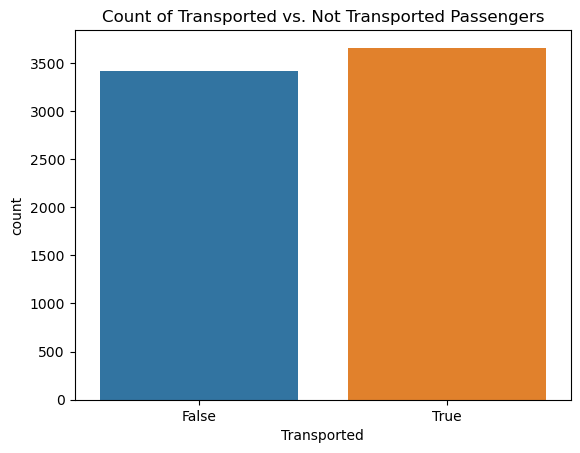

In [22]:
# Plot counts
plot = sns.countplot(x='Transported',data=df)

# Set title
plot.set(title="Count of Transported vs. Not Transported Passengers")

print(plot)

We can see that while that data set does contain more passenger where `Tranported == True`, the data set is mostly even, so we're not too concerned about data imbalance.

### Categorical feature summary <a name='cat-stats'></a>
[Back to top](#top)

Pandas contains various built-in methods to provide statistics for numerical data, but working with categorical data can be a bit more tedious. To start, we can plot counts for each categorical feature:

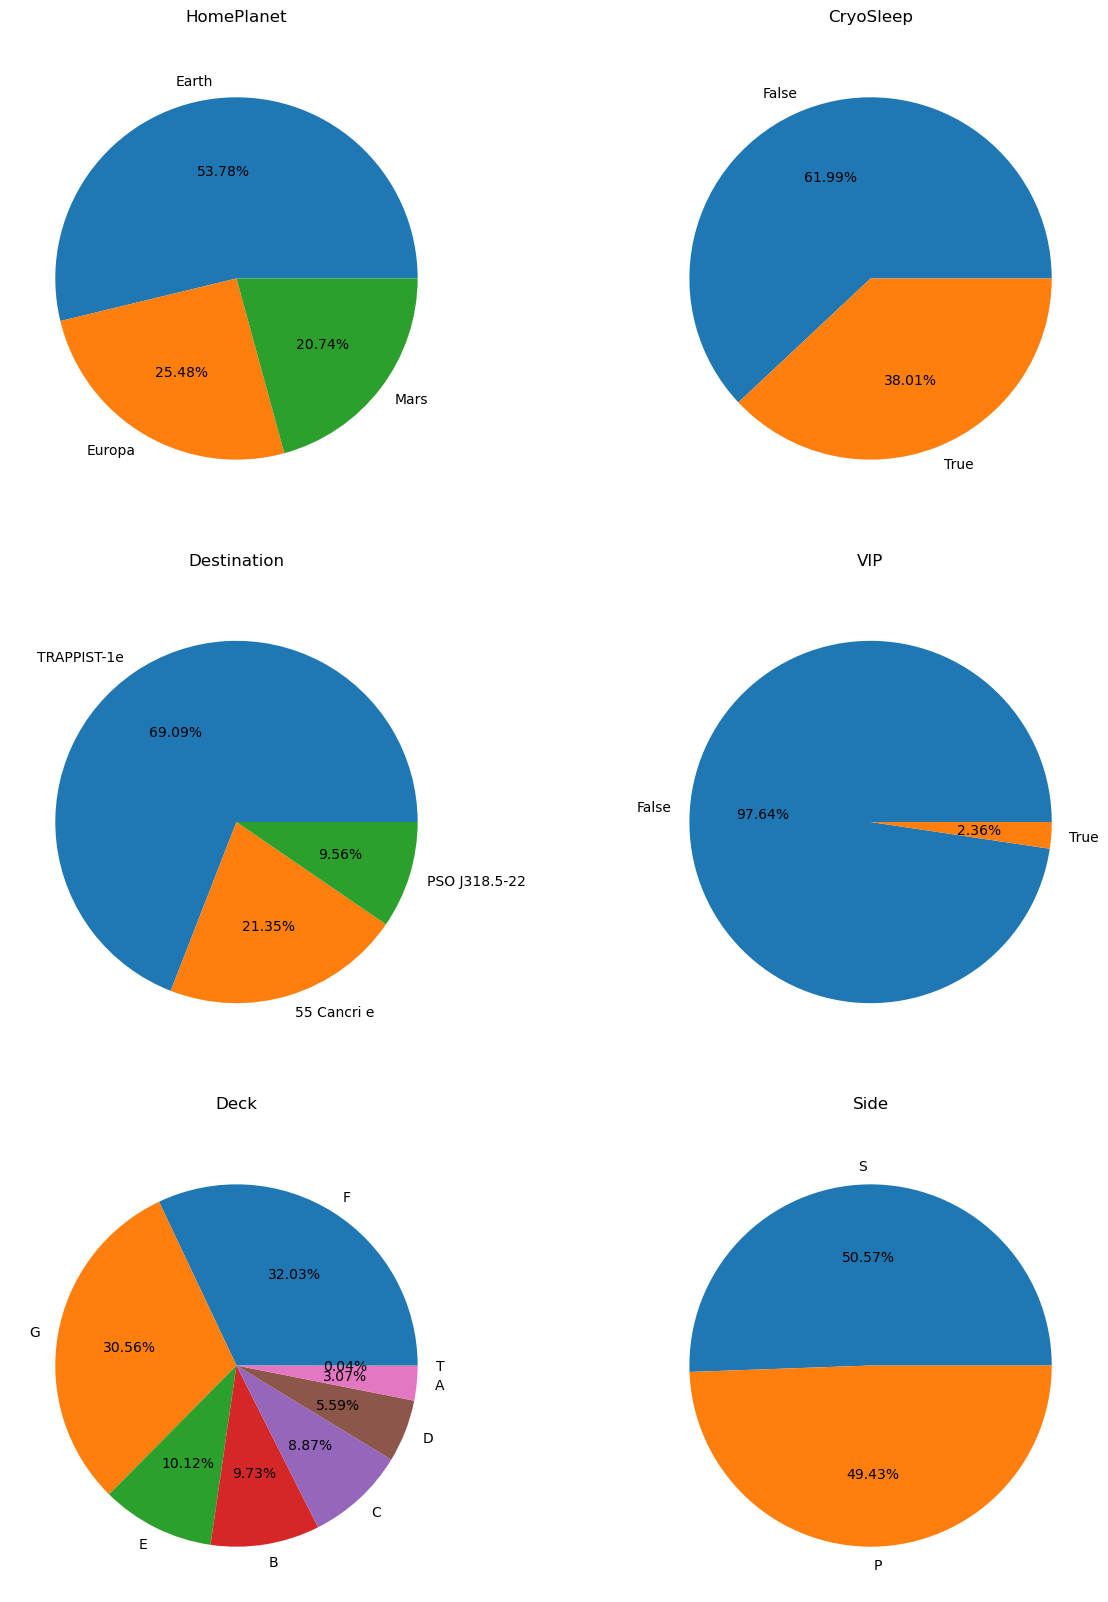

In [23]:
# Define a list of column names for which we will be creating pie charts
columns = ['HomePlanet', 'CryoSleep', 'Destination',
           'VIP', 'Deck','Side']

# Determine the number of figures needed to display all columns
num_figs = len(columns)
num_cols_per_fig = 2
num_rows_per_fig = num_figs // num_cols_per_fig

# Create empty lists to store the figures and axes
figs = []
axes = []

# Iterate over all the columns and create pie charts for each
for i in range(num_figs):
    # Check if we need to create a new figure
    if i % (num_cols_per_fig * num_rows_per_fig) == 0:
        fig, axs = plt.subplots(num_rows_per_fig, num_cols_per_fig, figsize=(15, 20))
        figs.append(fig)
        axes.append(axs)

    # Calculate the indices of the current row and column in the grid of subplots
    fig_index = i // (num_cols_per_fig * num_rows_per_fig)
    row_index = (i - fig_index * num_cols_per_fig * num_rows_per_fig) // num_cols_per_fig
    col_index = i % num_cols_per_fig

    # Get the current axis object
    axs = axes[fig_index]
    ax = axs[row_index, col_index]

    # Create a pie chart for the current column
    data_counts = df[columns[i]].value_counts()
    ax.pie(data_counts.values, labels=data_counts.index, autopct='%.2f%%')
    ax.set_title(columns[i], y=1.05)

### The `VIP` feature <a name='vip'></a>
[Back to top](#top)

Based on the data above, we can see that the sample size for passengers where `VIP == True` may not be large enough for meaningful analysis. We can check by getting a more detailed count:

In [24]:
# Get count of passengers' VIP status
df['VIP'].value_counts()

False    6905
True      167
Name: VIP, dtype: int64

Clearly, there are far too few VIP passengers to be significant. However, if a disproportionately large percentage of VIP passengers survived (or not), it may give us a clue as to the importance of socioeconomic status. We can double check with a survival rate plot:

AxesSubplot(0.125,0.11;0.775x0.77)


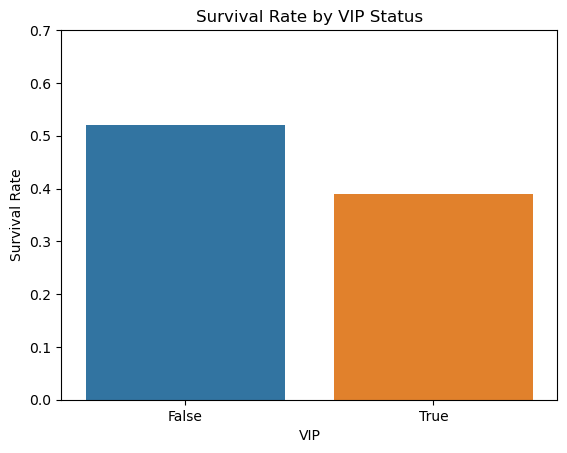

In [25]:
# Calculate the survival rate for each VIP status
survival_rates = df.groupby(['VIP']).mean()['Transported']

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Set the y-axis limit to 0.7 to better estimate data, add title and label
plot.set(ylim=(0, 0.7), title="Survival Rate by VIP Status", ylabel="Survival Rate" )

print(plot)

If anything, the opposite trend appears: non-VIP passengers appear slightly more likely to survive. In either case, it appears we can safely drop the `VIP` feature:

In [26]:
# Drop VIP column
df.drop(['VIP'], axis=1, inplace=True)

In [27]:
# Confirm VIP dropped
df.head(1)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Group
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,B,P,0001


The sample sizes of the rest of the data set seem adequate for our purposes. While there are a few `Deck` values with small sample sizes, we will need to analyze feature specifically in more detail before deciding what to do with that data, which we will cover more in depth in Part 2 Question 4.

### `Age` distribution <a name='age-dist'></a>
[Back to top](#top)

Next, we can visualize the distribution of `Age`:

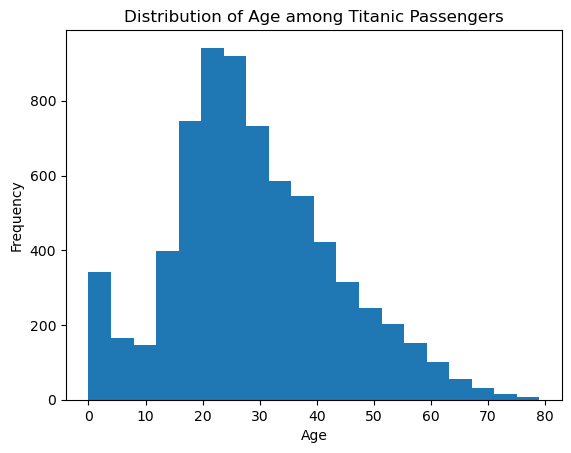

In [28]:
# extract the age variable from the dataset
age = df['Age']

# determine the appropriate number of bins for the histogram
num_bins = 20

# create the histogram using matplotlib's hist function
plt.hist(age, bins=num_bins)

# add labels and a title to the histogram
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age among Titanic Passengers')

# display the histogram
plt.show()

The `Age` distribution is slightly right skewed, with most passengers falling in the 15-35 range. Interestingly, there is a suprisingly number of passenger whose `Age == 0`. If we were to perform analysis with regard to age, it would likely be worthwhile to categorize passengers into age groups.

We've reseved exploration of the passenger spending data for Question 2 in the next section, where it is discussed more thoroughly.

### Part 1 summary <a name='p1-summary'></a>
[Back to top](#top)

In this section, we determined the data set was balance with regard to `Transported`, so we can perform reasonably meaningful analysis on passenger survival. After looking at the distribution of categorical features, we determined there were too few passengers where `VIP == True`, so we dropeed that column. We were also better able to get an idea of the distribution of passenger age.

## Part 2: Find the properties associated with passenger suvival <a name='p2'></a>
[Back to top](#top)

The goal of the Kaggle competion is to use the data set to predict passenger survival. As such, the main avenue of exploration is passenger survival. Here, we will take a look at various factors that might influence whether or not the passenger was transported to another dimension.

### Question 1: How is embarking from or traveling to a specific location associated with survival? <a name='p2q1'></a>
[Back to top](#top)

First, we'll explore the number of unique HomePlanets and the number of passengers related to each:

In [29]:
print(df.groupby('HomePlanet').size())

HomePlanet
Earth     3803
Europa    1802
Mars      1467
dtype: int64


There are three unqiue planets in the `HomePlanet` feature. We can see that about half of the passengers come from Earth while Europa and Mars have similar numbers of passengers.

We can plot the survival rates for each of these:

AxesSubplot(0.125,0.11;0.775x0.77)


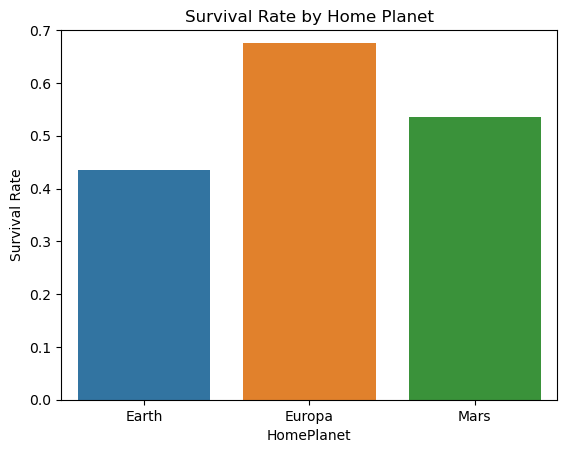

In [30]:
# Calculate the survival rate for each HomePlanet
survival_rates = df.groupby(['HomePlanet']).mean()['Transported']

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Set the y-axis limit to 0.7 to better estimate data, add title and label
plot.set(ylim=(0, 0.7), title="Survival Rate by Home Planet", ylabel="Survival Rate" )

print(plot)

Clearly, passengers from Europa had the highest rates of survival at about 0.68 while Earth had the lowest at about 0.45. This indicates that there might be some link between `HomePlanet` and `Transported`.

We can perform similar anaylsis on the `Destination` feature.

In [31]:
print(df.groupby('Destination').size())

Destination
55 Cancri e      1510
PSO J318.5-22     676
TRAPPIST-1e      4886
dtype: int64


There are three unqiue destination planets. We can see that the passengers are overwhelmingly traveling to TRAPPIST-1e, which is interesting.

We can plot the survival rates for each of these planets:

AxesSubplot(0.125,0.11;0.775x0.77)


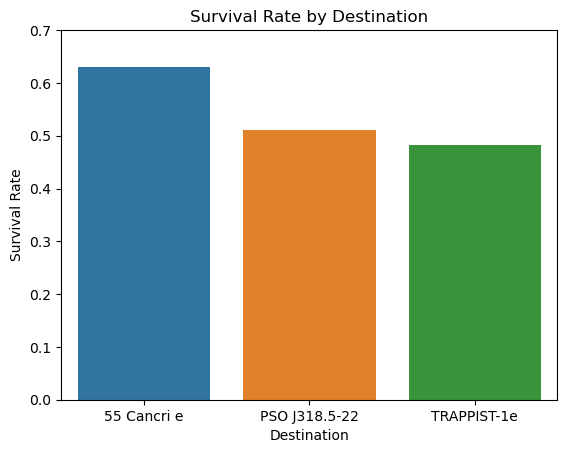

In [32]:
# Calculate the survival rate for each Destination
survival_rates = df.groupby(['Destination']).mean()['Transported']

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Set the y-axis limit to 0.7 to better estimate data, add title and label
plot.set(ylim=(0, 0.7), title="Survival Rate by Destination", ylabel="Survival Rate")

print(plot)

Interestingly, TRAPPIST-1e has the lowest survival rate amongst the destinations and was also the most traveled to destination by far, so it seems like there may be some underlying trend there. That said, the range of survival rates is much smaller for `Destination` than it was for `HomePlanet`, so `Destination` may not be as strongly associated with survival as `HomePlanet`.

As a sort of summary, we can plot the survival rates of `HomePlanet`/`Destination` combinations and see if there are any emergent trends.

AxesSubplot(0.125,0.11;0.775x0.77)


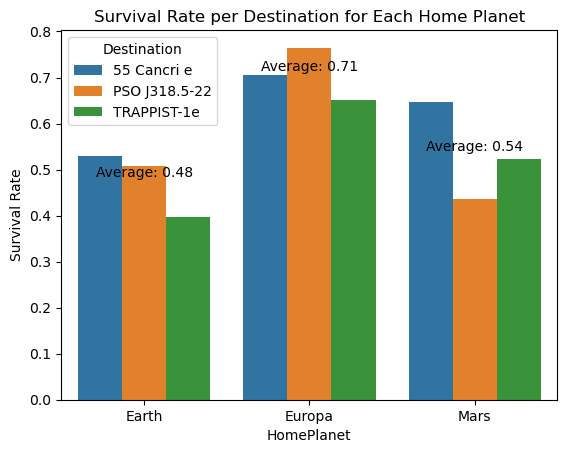

In [33]:
# Calculate the survival rate for each HomePlanet/Destination combo
survival_rates = df.groupby(['HomePlanet', 'Destination']).mean()['Transported']

# Reset the index to make HomePlanet and Destination into columns again (for plotting)
survival_rates = survival_rates.reset_index()

# Create a bar chart showing the survival rates for each combo
plot = sns.barplot(x='HomePlanet', y='Transported', hue='Destination', data=survival_rates)

# Add title and label
plot.set(title="Survival Rate per Destination for Each Home Planet", ylabel="Survival Rate")

# Display mean average on the graph
averages = survival_rates.groupby('HomePlanet')['Transported'].mean()
for i, avg in enumerate(averages):
    plt.annotate(f"Average: {avg:.2f}", xy=(i, avg), ha='center', va='bottom')

print(plot)

One striking trend displayed above is that nearly 80% passengers from Europa who were traveling to PSO J318.5-22 survived. On the flip side, just under 40% of passengers from Earth traveling to TRAPPIST-1e survived. Additionally, while the mean survival rate for Mars and Earth is roughly 50%, Europa's is much higher at 70%. 

As we indicated earlier, the `Destination` TRAPPIST-1e tends much lower than mean for Earth and Europa, but it's much closer to the average for Mars, where the other two destinations are much more distant from the mean.

#### Question 1 summary <a name='p2q1-summary'></a>
[Back to top](#top)

Question 1 asks "How is embarking from or traveling to a specific location associated with survival?"

We found that the distribution shows that most passengers come from Earth and are headed to TRAPPIST-1e. Passengers from Earth have the lowest survival rate at about 0.44 while passengers from Europa have the highest at about 0.68, so `HomePlanet` appears to be slightly correlated with survival.

On the flip side, `Destination` appears to be less strongly linked to survival. Passengers headed to TRAPPIST-1e and PSO J318.5-22 had survival rates of about 0.5 while 55 Cancri e has a rate of about 0.64. It's worth noting that the sample size for `Destination` is heavily skewed toward TRAPPIST-1e, and less than 8% of passengers were headed to PSO J318.5-22, so conclusions from this data may be of dubious significance. 

### Question 2: Is passenger socioeconomic status related to survival? <a name='p2q2'></a>
[Back to top](#top)


The data set contains some information we can use to approximate the socioeconomic status of passengers. There are various features that contain the amount spent at the amenities aboard the Spaceship Titanic: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`. Together, these represent a sort of proxy for socioeconomic status. As such, we can use them to divide the passengers up by their presumed socioeconomic class. To do so, we'll create three categores, lower, middle, and upper to represent the socioeconomic status of passengers, and we'll need to determine thresholds of spending for these classes.

#### The `TotalSpent` feature <a name='spent'></a>
[Back to top](#top)

Before dividing passengers into classes, however, we can comine the spending features into a single feature, `TotalSpent`, representing the passengers spending across all amenities. Afterward, we can drop the original columns. This will not only reduce dimensionality, but analayzing spending at individual amenities as they relate to survival is outside the scope of this project. 

In [34]:
# Create TotalSpent as a sum of the amenities columns
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

# Drop amenities columns
df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [35]:
# Verify creation of TotalSpent and dropping of amenities columns
df.head(2)

,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Side,Group,TotalSpent
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0001,0.0
1,Earth,False,TRAPPIST-1e,24.0,True,F,S,0002,736.0


Next, we'll use quantiles to differentiate passengers according to their total spending on amenities, as indicated by the newly-created `TotalSpent` feature. Importantly, passengers in CryoSleep would not be able to spend money at amenities, so they need to be excluded from this analysis first before going further. We'll create a subset of the data containing only passengers not in CryoSleep for this part:

In [36]:
# Get a subset of the data containing only passengers not in CryoSleep
awake = df[df['CryoSleep'] == False].copy()
print(f"Number of passengers not in CryoSleep: {awake.shape[0]}")
awake.head(1)

Number of passengers not in CryoSleep: 4384


,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Side,Group,TotalSpent
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0001,0.0


To get an overview, we can create a histogram of passenger spending:

<AxesSubplot: xlabel='TotalSpent', ylabel='Count'>

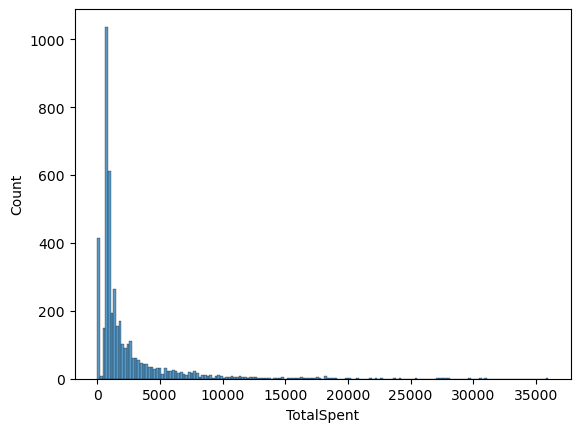

In [37]:
# Plot histogram of passenger spending
sns.histplot(awake['TotalSpent'])

It appears that most passengers spend less than about 2,500, but there are still quite a few that spend a bit more (and a few that spend quite a bit more). Let's get more detail using df.describe():

In [38]:
awake['TotalSpent'].describe()

count     4384.000000
mean      2319.061131
std       3294.501584
min          0.000000
25%        761.750000
50%       1051.000000
75%       2507.750000
max      35987.000000
Name: TotalSpent, dtype: float64

We can see from the table above that 50th percentile is still a bit far from the feature's mean, but it does jump up quite a bit by the 75th percentile. Even still, the presence of large outliers is apparent, as the maximum value is orders of magnitude higher than the mean. Let's see what the data looks like without the top 10% of spenders:

In [39]:
# Exclude the top 10% of spenders
subset = awake.where(awake['TotalSpent'] < awake['TotalSpent'].quantile(0.90))
subset.describe()

,Age,TotalSpent
count,3945.000000,3945.000000
mean,29.094550,1439.632446
std,14.161895,1226.483888
min,0.000000,0.000000
25%,20.000000,738.000000
50%,27.000000,923.000000
75%,38.000000,1822.000000
max,79.000000,5746.000000


#### The `Class` feature <a name='class'></a>
[Back to top](#top)

From the table above, we can see that the mean changes dramatically, but the individual quartiles change less so. As such, we can ignore the effect of the outliers and use approximate values at the 25th and 75th percentiles as out class thresholds:
- Lower class: `TotalSpent <= 800`
- Middle class:  `800 < TotalSpent < 2500`
- Upper class: `TotalSpent >= 2500`

We can now use these to make a new feature called `Class`:

In [40]:
# Define the conditions and class labels
conditions = [
    awake['TotalSpent'] <= 800,
    (awake['TotalSpent'] > 800) & (awake['TotalSpent'] < 2500),
    awake['TotalSpent'] >= 2500
]
class_labels = ['Lower', 'Middle', 'Upper']

# Create a new column 'Class' based on the conditions and labels
awake['Class'] = np.select(conditions, class_labels, default='Unknown')

In [41]:
# Verify Class was created
awake.head()

,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Side,Group,TotalSpent,Class
0,Europa,False,TRAPPIST-1e,39.0,False,B,P,0001,0.0,Lower
1,Earth,False,TRAPPIST-1e,24.0,True,F,S,0002,736.0,Lower
2,Europa,False,TRAPPIST-1e,58.0,False,A,S,0003,10383.0,Upper
3,Europa,False,TRAPPIST-1e,33.0,False,A,S,0003,5176.0,Upper
4,Earth,False,TRAPPIST-1e,16.0,True,F,S,0004,1091.0,Middle


In [42]:
# Get the number of passengers in each class
awake['Class'].value_counts()

Middle    1928
Lower     1356
Upper     1100
Name: Class, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


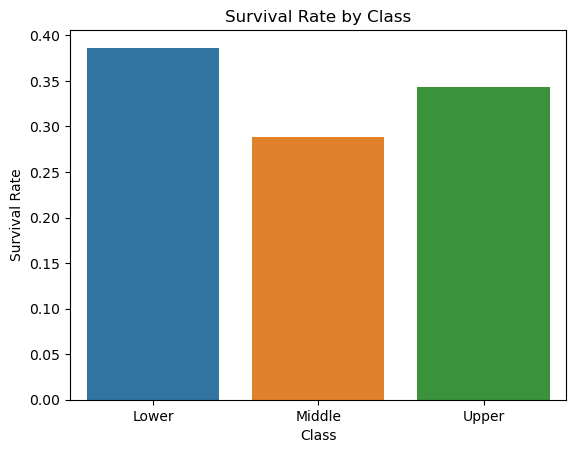

In [43]:
# Calculate the survival rate for each Class
survival_rates = awake.groupby(['Class'])['Transported'].mean()

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Set the y-axis limit to 0.7 to better estimate data, add title and label
plot.set(title="Survival Rate by Class", ylabel="Survival Rate")

print(plot)

Interestingly, it appears that all three classes have a survival rate roughly between 0.3 and 0.4. The initial expectation was that higher socioeconomic status would be associated with higher survival, but that doesn't appear to be the case.

#### Question 2 summary  <a name='p2q2-summary'></a>
[Back to top](#top)

Question 2 asks "Is passenger socioeconomic status related to survival?" The data set provides a few features we can use to estimate the socioeconomic status of passengers. After combining the amenities spending into a single feature called `TotalSpent`, a `Class` feature was created containing the approximate socioeconomic class of the passenger. 

Ultimately, socioeconomic status does not track closely with passenger surivival. Based on the information above, it appears that passenger spending is not a strong predictor of passenger survival. However, this analysis could necessarily only be performed on passenger not in CryoSleep

### Question 3: Is CryoSleep related to survival?  <a name='p2q3'></a>

[Back to top](#top)

Next, we will explore the effect of another important feature on survival: `CryoSleep`. As mentioned previously, `CryoSleep` is a boolean indicating whether or not the passenger elected to be frozen for the duration of the trip. This is a unique feature in general, but it's nature also means its effect on survival is hard to hypothesize. Naturally, this is definitely the type of feature worth exploring. 

We'll start by getting a basic count:

In [44]:
df['CryoSleep'].value_counts()

False    4384
True     2688
Name: CryoSleep, dtype: int64

Given this infromation, it appears there may be enough passengers where `CryoSleep == True` to perform some meaningful analysis. We can check the survival rates for each group:

AxesSubplot(0.125,0.11;0.775x0.77)


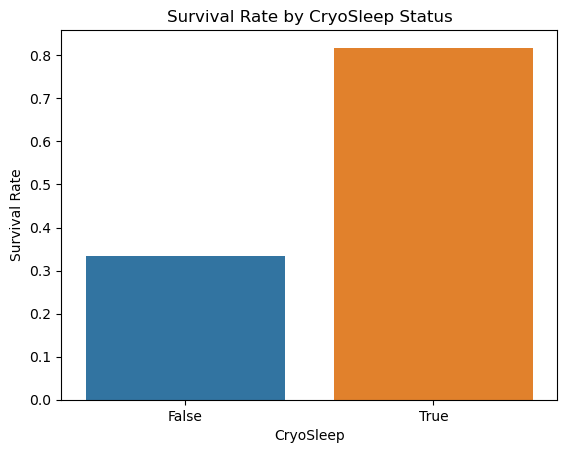

In [45]:
# Calculate the survival rate for each CryoSleep status
survival_rates = df.groupby(['CryoSleep'])['Transported'].mean()

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Set the y-axis limit to 0.7 to better estimate data, add title and label
plot.set(title="Survival Rate by CryoSleep Status", ylabel="Survival Rate")

print(plot)

The graph above shows that about 80% of `CryoSleep` passengers survived while only about 35% of passenger not in `CryoSleep` survived.

#### Question 3 Summary  <a name='p2q3-summary'></a>

[Back to top](#top)

Question 3 asks "Is `CryoSleep` related to survival?" Of the 7,072 passengers in the dat set, 2,688 f them were in `CryoSleep` (about 30% of the data set). Clearly, the difference in survival rates between these two categories is quite dramatic. Roughly four out five passengers in `CryoSleep` survived while only about 35% of passengers not in `CryoSleep` survived. As such, it appears that `CryoSleep` is likely a good predictor of passenger survival.

### Question 4: Is location of cabin (`Deck`, `Side`) related to survival?  <a name='p2q4'></a>

[Back to top](#top)

Curiously, the point at which the anomaly came into contact with the Space Titanic wasn't reported. Assuming that proximity to the anomaly meant a higher chance of being Transported, by answering this question we not only gain insight into the location of impact but also can determine whether passengers on a certain Side or a specific Deck were more likely to be Transported than others.

Let's start by determining if passengers on a certain side of the ship were more likely to be Transported. We'll first get a count of the passengers on each side.

In [46]:
df['Side'].value_counts()

S    3576
P    3496
Name: Side, dtype: int64

As expected there are roughly the same amount of passengers on each side of the ship. This works to our advantage since the data would be skewed if there was a larger difference in these values, though the difference should be noted nonetheless.

AxesSubplot(0.125,0.11;0.775x0.77)


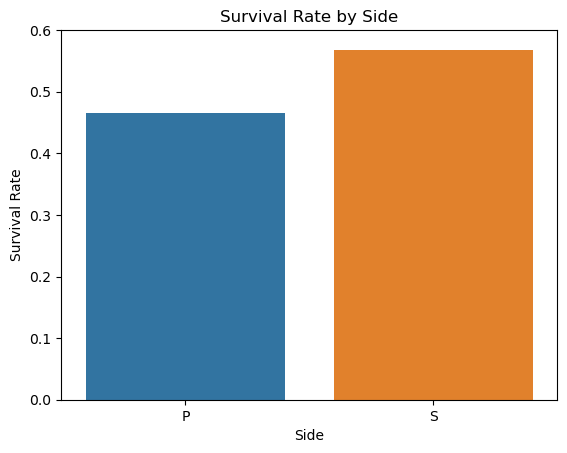

In [54]:
# Calculate the survival rate for each Side of the Ship
survival_rates = df.groupby(['Side'])['Transported'].mean()

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Add title and label y-axis
plot.set(ylim=(0, 0.6), title="Survival Rate by Side", ylabel="Survival Rate")

print(plot)

Based on our results, it appears that passengers on the Port Side were slightly more likely to be transported than those on the Starboard Side of the ship.

Now let's find if certain a certain Deck was more affected than the others.

In [48]:
df['Deck'].value_counts()

F    2265
G    2161
E     716
B     688
C     627
D     395
A     217
T       3
Name: Deck, dtype: int64

Unfortunately, there is a much greater variation in passenger numbers between Decks than there were for the Sides.

In [57]:
df['Deck'].value_counts().describe()

count       8.000000
mean      884.000000
std       856.133334
min         3.000000
25%       350.500000
50%       657.500000
75%      1077.250000
max      2265.000000
Name: Deck, dtype: float64

Regardless we can still plot the data and see if a pattern appears:

AxesSubplot(0.125,0.11;0.775x0.77)


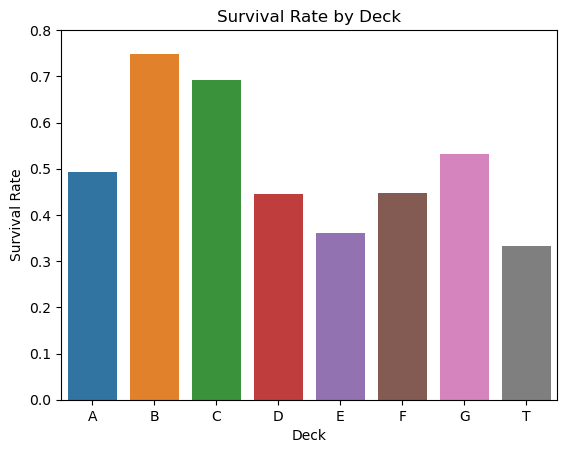

In [58]:
# Calculate the survival rate for each Deck
survival_rates = df.groupby(['Deck'])['Transported'].mean()

# Create a bar chart showing the survival rates for each
plot = sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Add title and label y-axis
plot.set(ylim=(0, 0.8), title="Survival Rate by Deck", ylabel="Survival Rate")

print(plot)

It appears that the `Decks` with the lowest survival rates are the E and T `Decks`. However, seeing as the T Deck only has 3 passengers it is definitely an outlier and we can safely exclude it from our analysis. The E `Deck` on the other hand not only has the third largest number of passengers, it also has a similar number of passengers as B and C `Deck`. I think that it can be reasonably concluded that it was the most effected by the anomaly. Another thing to note is that the B and C `Decks` had the highest survival rates. 

#### Question 4 Summary  <a name='p2q4-summary'></a>

[Back to top](#top)

Question 4 asks whether or not the location of the passengers cabin is related to their survival. Without a clear map of the ship's layout it would be difficult to pinpoint the point of impact with the anomaly. From our plotting, we were able to see that the Port `Side` had a lower survival rate. While `Deck` E appears to be the most impacted, A, D, and F all had survival rates below 50%. `Deck` G fared a bit better with a roughly 55% survival rate. The only thing that is clear from this analysis is that the survival rates for `Decks` B and C were much higher than that of the others. It could be possible that `Decks` B and C were the point of impact and the anomaly had a wide range of effect around them instead of directly that point. Further information would be required regarding the layout of the ship and possible other factors such as these decks being reserved for individuals in Cryosleep before any definite conclusions could be drawn.

## Part 2 Summary  <a name='p2-summary'></a>
[Back to top](#top)

In this part, we explored the relationship between several features and passenger survival. An analysis of `Destination` and `HomePlanet` showed that `HomePlanet` is likely a stronger predictor of `Transported` status than `Destination`. Interestingly, TRAPPIST-1e had the lowest survival rate despite being the most popular destination.

When examining socioeconomic status, the survival rates were relatively similar across different socioeconomic classes. As such, no clear correlation was found between `TotalSpent`/`Class` (out proxy for socioeconomic status) and `Transported` status.

The analysis also revealed that passengers in CryoSleep had a significantly higher survival rate compared to those not in CryoSleep, suggesting that CryoSleep was a reliable predictor of survival.

Similarly, while the sample sizes leave a bit to be desired, `Deck` may be somewhat strongly correlated to `Transported`, while the effect of `Side` is less pronounced.

# Conclusion <a name='conclusion'></a>
[Back to top](#top)

In the sections above, we explored the Spaceship Titanic data set provided by Kaggle. The aim of the project was to explore the data set, but to also perform rudimentary analysis with regard to passegner survival (as indidcated by `Transported` status). 

Before the moving on to the analysis, however, we performed some data cleaning operations such as dropping `NaN` values from the data. We extracted the `Group`, `Deck`, `Side`, and `TotalSpent` features, dropping `Cabin`, `VIP`, `PassengerID`, `Name`, and the amenities spending features in the process. We then analyzed the distrubtion of cateogrical and numerical features before proceeding to survival analysis.

Ultimately, the survival analysis focused on four questions, attempting to determine a correlation between `Transported` and each of the following features: `HomePlanet`, `Destination`, `TotalSpent`, `CryoSleep`, `Deck`, and `Side` (we also plotted survival rates by VIP status as part of our `VIP` exploration). Of these features, we found that `CryoSleep` had the strongest relationship to `Transported` while `Deck` might also be a strong indicator of survival. Further analysis of the other features will be required to draw more meaningful conclusions with respect to those features' effects on `Transported` status.

Clearly, there are multiple factors that influence passenger survival, and this analysis did not focus on the combinative effect of features on passenger survival. This and other directions for future research are discussed in the next section.

# Future Directions <a name='future'></a>
[Back to top](#top)

The scope of this project was exploratory in nature, so there are certainly more insights to be gleaned from the data set. For example, more features could be extracted from the data set. The group portion of `PassengerId` and `Name` could be used to create a feature exploring the number of family members a passenger has on board. Similarly, further analyzing the `Group` feature as it relates to survival could be an interesting area of study.

Additionally, the analysis presented here would greatly benefit from employment of more advance statistical methods. For example, since determing `Transported` for a given passenger is a binary problem, logisitic regression may be be used to determine the statistical significance of features as they relate to `Transported` (i.e., survival). As mentioned previously, analyzing the effect on survival of features in conjunction with one another would likely yield promising results.